# Más técnicas de Data Munging

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Repasando las distribuciones

### Distribución uniforme

(array([103.,  92.,  91.,  85., 107., 111.,  98.,  95., 106., 112.]),
 array([ 1.0063477 , 10.90449714, 20.80264658, 30.70079602, 40.59894546,
        50.4970949 , 60.39524434, 70.29339379, 80.19154323, 90.08969267,
        99.98784211]),
 <a list of 10 Patch objects>)

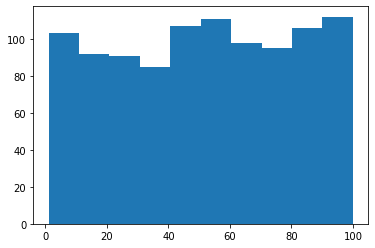

In [4]:
low_lim = 1 # Límite inferior
up_lim = 100 # Límite superior
samples = 1000 # Cantidad de muestras
uniform_data = np.random.uniform(low_lim, up_lim, samples)
plt.hist(uniform_data)

### Distribución normal

(array([ 11.,  40., 109., 183., 245., 199., 128.,  58.,  22.,   5.]),
 array([-2.86491674, -2.25198129, -1.63904584, -1.02611039, -0.41317494,
         0.1997605 ,  0.81269595,  1.4256314 ,  2.03856685,  2.6515023 ,
         3.26443775]),
 <a list of 10 Patch objects>)

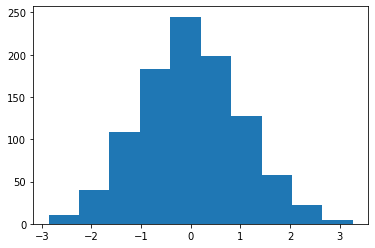

In [8]:
samples = 1000 # Cantidad de muestras
normal_data = np.random.randn(samples)
plt.hist(normal_data)

#### Distribución normal personalizada

(array([  4.,  19.,  52., 137., 192., 249., 210.,  91.,  35.,  11.]),
 array([-3.21855582, -1.69570896, -0.17286209,  1.34998477,  2.87283164,
         4.3956785 ,  5.91852537,  7.44137224,  8.9642191 , 10.48706597,
        12.00991283]),
 <a list of 10 Patch objects>)

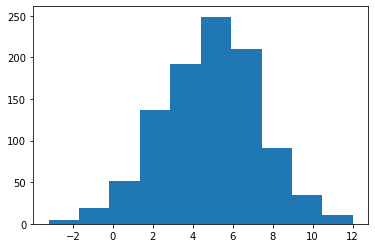

In [10]:
mean = 5 # Media
std = 2.5 # Desviación estándar
samples = 1000 # Cantidad de muestras
normal_data = mean + std * np.random.randn(samples)
plt.hist(normal_data)

## Aplicando distribuciones a la creación de datasets

In [11]:
n_rows = 100
data = pd.DataFrame(
    {
        'Normal': np.random.randn(n_rows),
        'Uniforme': np.random.uniform(0, 100, n_rows),
        'Normal personalizada': 5 + 2.5 * np.random.randn(n_rows)
    }
)

In [12]:
data.head()

,Normal,Uniforme,Normal personalizada
0,0.115515,51.129163,6.252303
1,-0.813207,64.504017,6.314783
2,0.096747,63.228811,7.157897
3,0.774802,82.207729,5.902003
4,1.573668,0.272472,9.209926


(array([ 1.,  1.,  3.,  6., 22., 21., 15., 16., 12.,  3.]),
 array([-3.09720216, -2.54921058, -2.00121901, -1.45322743, -0.90523585,
        -0.35724427,  0.19074731,  0.73873888,  1.28673046,  1.83472204,
         2.38271362]),
 <a list of 10 Patch objects>)

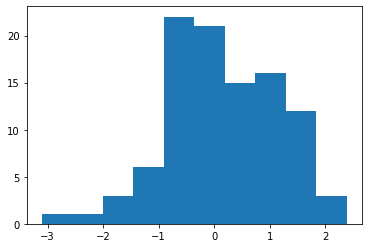

In [13]:
plt.hist(data['Normal'])

(array([14.,  8., 10., 15., 11.,  6., 11., 11.,  6.,  8.]),
 array([ 0.27247209, 10.16176247, 20.05105285, 29.94034323, 39.82963361,
        49.71892399, 59.60821437, 69.49750475, 79.38679513, 89.27608551,
        99.16537589]),
 <a list of 10 Patch objects>)

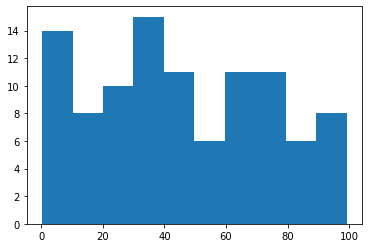

In [15]:
plt.hist(data['Uniforme'])

(array([ 3.,  7.,  3., 15., 19., 14., 12., 13.,  7.,  7.]),
 array([-1.64834325, -0.46203472,  0.72427382,  1.91058235,  3.09689089,
         4.28319943,  5.46950796,  6.6558165 ,  7.84212504,  9.02843357,
        10.21474211]),
 <a list of 10 Patch objects>)

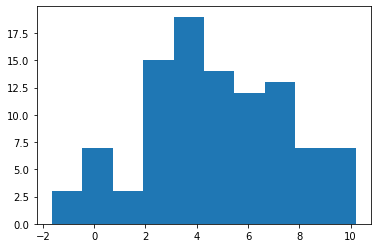

In [16]:
plt.hist(data['Normal personalizada'])

### Dataset personalizado - computadoras aleatorias

In [17]:
brand = ["Gigabyte", "MSI", "Lenovo", "Dell", "Acer"] # Agregar más
graphic_card = ["Gtx 1660 Ti", "Rtx 2080 Ti", "Integrated"] # Agregar más
memory = ["4gb", "8gb", "16gb"] # Agregar más
monitor_type = ["TN", "VA", "IPS"] # Agregar más
monitor_res = ["HD", "FHD", "4K"] # Agregar más
# More

In [19]:
n_rows = 100
brand_data = np.random.choice(brand, size=n_rows)
graphic_card_data = np.random.choice(graphic_card, size=n_rows)
memory_data = np.random.choice(memory, size=n_rows)
monitor_type_data = np.random.choice(monitor_type, size=n_rows)
monitor_res_data = np.random.choice(monitor_res, size=n_rows)

In [20]:
data = pd.DataFrame(
    {
        'Brand': brand_data,
        'Graphic Card': graphic_card_data,
        'Memory': memory_data,
        'Monitor Type': monitor_type_data,
        'Monitor Resolution': monitor_res_data,
    }
)

In [21]:
data.head()

,Brand,Graphic Card,Memory,Monitor Type,Monitor Resolution
0,Acer,Integrated,4gb,IPS,4K
1,MSI,Integrated,4gb,IPS,4K
2,Dell,Rtx 2080 Ti,16gb,TN,4K
3,Acer,Gtx 1660 Ti,16gb,IPS,4K
4,Lenovo,Rtx 2080 Ti,4gb,IPS,FHD


## Agrupado de datos por variables categóricas

In [23]:
grouped_brand = data.groupby("Brand")

In [24]:
grouped_brand.groups

{'Acer': Int64Index([ 0,  3,  8, 11, 12, 14, 18, 24, 31, 32, 33, 42, 43, 55, 58, 60, 65,
             76, 78, 88, 96, 97, 98],
            dtype='int64'),
 'Dell': Int64Index([ 2, 13, 19, 20, 25, 27, 37, 44, 46, 48, 50, 54, 57, 59, 61, 64, 66,
             69, 71, 72, 73, 74, 80, 81, 83, 85, 87, 89, 93],
            dtype='int64'),
 'Gigabyte': Int64Index([17, 22, 23, 26, 29, 35, 38, 39, 40, 51, 62, 67, 86, 91], dtype='int64'),
 'Lenovo': Int64Index([4, 5, 6, 9, 21, 30, 34, 36, 45, 52, 56, 63, 70, 77, 79, 84, 90,
             99],
            dtype='int64'),
 'MSI': Int64Index([1, 7, 10, 15, 16, 28, 41, 47, 49, 53, 68, 75, 82, 92, 94, 95], dtype='int64')}

In [25]:
grouped_brand.get_group("Dell")

,Brand,Graphic Card,Memory,Monitor Type,Monitor Resolution
2,Dell,Rtx 2080 Ti,16gb,TN,4K
13,Dell,Integrated,8gb,VA,HD
19,Dell,Integrated,16gb,TN,FHD
20,Dell,Rtx 2080 Ti,8gb,IPS,FHD
25,Dell,Integrated,16gb,TN,FHD
27,Dell,Rtx 2080 Ti,16gb,VA,FHD
37,Dell,Gtx 1660 Ti,16gb,VA,HD
44,Dell,Gtx 1660 Ti,16gb,VA,FHD
46,Dell,Rtx 2080 Ti,8gb,IPS,4K
48,Dell,Rtx 2080 Ti,4gb,IPS,FHD


## Bonus - Simulación de Monte Carlo

In [26]:
experiments = 1000
throws = 1000
pi_aprox_list = []

for i in range(experiments):
    count = 0
    for j in range(throws):
        x = np.random.uniform(0,1)
        y = np.random.uniform(0,1)
        z = np.sqrt(x**2 + y**2)
        if z <= 1: 
            count += 1
    pi_aprox = count / throws * 4
    pi_aprox_list.append(pi_aprox)
    
pi = np.mean(pi_aprox_list)
print(f"Pi value is {pi}")

Pi value is 3.1412039999999997
